In [105]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [106]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=10)

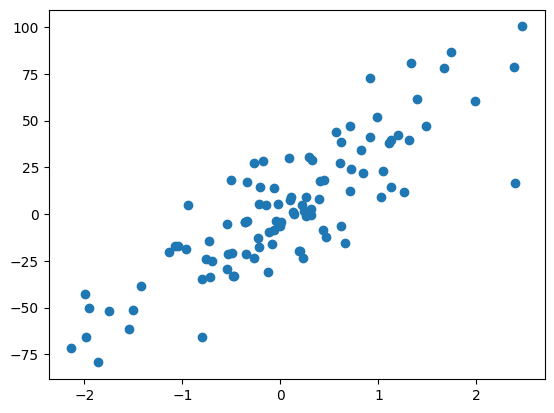

In [107]:
plt.scatter(X,y)

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
lr = LinearRegression()

In [128]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[29.00787223]
0.4006829151640128


In [137]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8099466560838575

In [138]:
class GDRess:
    def __init__(self,learning_rate,ep):
        self.m=100
        self.b=-102
        self.lr=learning_rate
        self.ep=ep
    def fit(self,X,y):
        for i in range(self.ep):
            loss_slp_b = -2*np.sum(y- self.m*X.ravel() - self.b)
            loss_slp_m = -2*np.sum((y- self.m*X.ravel() - self.b)*X.ravel())

            self.b = self.b - self.lr*loss_slp_b
            self.m = self.m - self.lr*loss_slp_m
            #print(loss_slp,self.b)
        print(self.m,self.b)    
    def predict(self,X):
        return self.m*X.ravel() + self.b
        

In [133]:
gd = GDRess(0.001,80)

In [139]:
gd.fit(X_train,y_train)

29.007882584010556 0.40067953011711793


In [140]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8099467665196179